# K Means clustering using EM Algorithm

> Libraries used are Scikit-learn, matplotlib, numpy, pandas

Here we have imported the datasets package from scikit-learn to load the iris dataset

In [37]:
from sklearn import datasets
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

We load the Iris plant dataset from sklearn.datasets package
Then, we load data (features) in `x`, and target column in `y`

In [5]:
iris = datasets.load_iris()

x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

print(x)
print(y)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            

`model` is the K-Means clustering model from the sklearn library

`n_clusters` is the attribute that specifies the cluster size for the KMeans model being created

`model.fit(x)` finally fits the model to the feature vector `x`

In [6]:
model = KMeans(n_clusters = 3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

`colormap` is the vector containing the color map values for the clustering model used in plotting the dataset

In [29]:
colormap = np.array(['red','lime','black'])

The `sklearn.preprocessing` package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In [19]:
from sklearn import preprocessing

The `preprocessing` module further provides a utility class `StandardScaler` that implements the `Transformer` API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

It is possible to disable either centering or scaling by either passing `with_mean=False` or `with_std=False` to the constructor of StandardScaler

In [20]:
scaler = preprocessing.StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

The `scaler` instance can then be used on new data to transform it the same way it did on the training set

In [21]:
xsa = scaler.transform(x) # transform data based on the originally fitted scaler
xs = pd.DataFrame(xsa, columns = x.columns) # then make a DataFrame from it

`GaussianMixture` is a representation of a Gaussian mixture model probability distribution. This class allows to estimate the parameters of a Gaussian mixture distribution

In [22]:
from sklearn.mixture import GaussianMixture

`n_components` is the number of mixture components.

In [23]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
gmm_y = gmm.predict(xs)
gmm_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## Plotting 3 types of clustering

- Actual
- K-Means
- Gaussian Mixture Model

Text(0,0.5,'Petal Width')

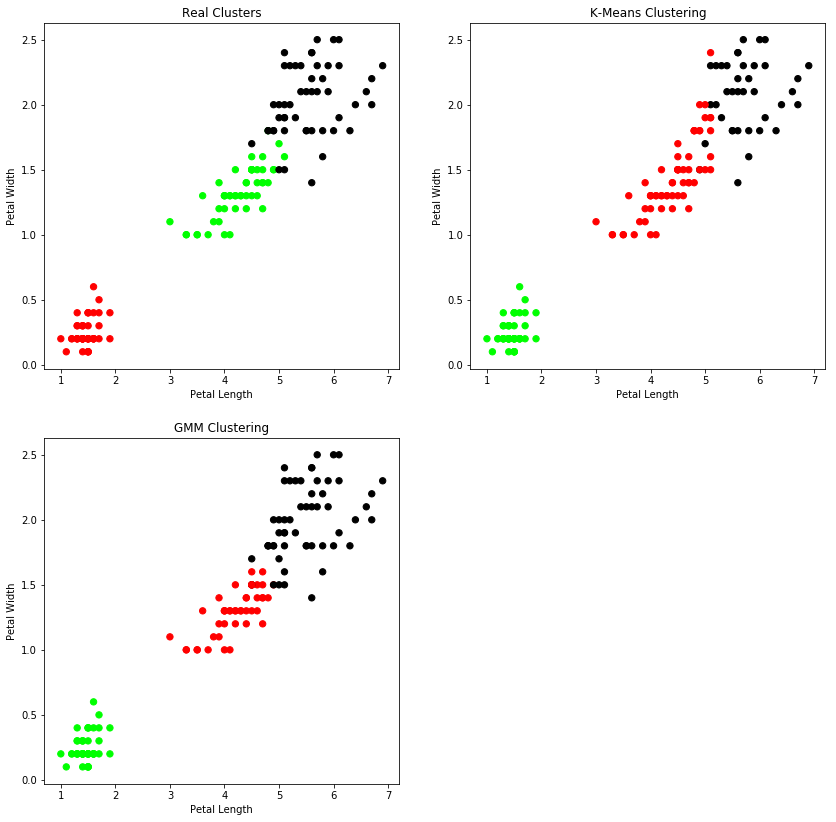

In [39]:
# Original Clustering (classifications) using petal features
plt.figure(figsize = (14,14))
plt.subplot(2, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# KMeans clustering
plt.subplot(2, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[model.labels_], s = 40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

#plot the GMM Clustering
plt.subplot(2, 2, 3)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[gmm_y], s = 40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [28]:
print("Observation:\nThe GMM using EM algm based clustering matched the true labels more closely than the KMeans algm")

Observation:
The GMM using EM algm based clustering matched the true labels more closely than the KMeans algm
